In this notebook we try to identify sequences by:
* hashing images and looking for similar hashes, following ideas from https://github.com/JohannesBuchner/imagehash/blob/master/find_similar_images.py
* comparing histograms of pixel intensities

In [2]:
! pip install imagehash

     |████████████████████████████████| 296kB 1.5MB/s eta 0:00:01


In [84]:
#!/usr/bin/env python
from __future__ import (absolute_import, division, print_function)
from PIL import Image
import six

import imagehash

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

"""
Demo of hashing
"""
def find_similar_images(userpaths, hashfunc = imagehash.average_hash):
    import os
    def is_image(filename):
        f = filename.lower()
        return f.endswith(".png") or f.endswith(".jpg") or \
            f.endswith(".jpeg") or f.endswith(".bmp") or f.endswith(".gif") or '.jpg' in f
    
    image_filenames = []
    for userpath in userpaths:
        image_filenames += [os.path.join(userpath, path) for path in os.listdir(userpath) if is_image(path)]
    images = {}
    for img in sorted(image_filenames):
        try:
            hash = hashfunc(Image.open(img))
        except Exception as e:
            print('Problem:', e, 'with', img)
        if hash in images:
            print(img, '  already exists as', ' '.join(images[hash]))
            if 'dupPictures' in img:
                print('rm -v', img)
        images[hash] = images.get(hash, []) + [img]
        print("---------------")
    
    return images
#     for k, img_list in six.iteritems(images):
#        if len(img_list) > 1:
#            print(" ".join(img_list))


# if __name__ == '__main__':
#     import sys, os
#     def usage():
#         sys.stderr.write("""SYNOPSIS: %s [ahash|phash|dhash|...] [<directory>]
# Identifies similar images in the directory.
# Method: 
#   ahash:      Average hash
#   phash:      Perceptual hash
#   dhash:      Difference hash
#   whash-haar: Haar wavelet hash
#   whash-db4:  Daubechies wavelet hash
# (C) Johannes Buchner, 2013-2017
# """ % sys.argv[0])
#         sys.exit(1)
    
#     hashmethod = sys.argv[1] if len(sys.argv) > 1 else usage()
#     if hashmethod == 'ahash':
#         hashfunc = imagehash.average_hash
#     elif hashmethod == 'phash':
#         hashfunc = imagehash.phash
#     elif hashmethod == 'dhash':
#         hashfunc = imagehash.dhash
#     elif hashmethod == 'whash-haar':
#         hashfunc = imagehash.whash
#     elif hashmethod == 'whash-db4':
#         hashfunc = lambda img: imagehash.whash(img, mode='db4')
#     else:
#         usage()
#     userpaths = sys.argv[2:] if len(sys.argv) > 2 else "."
#     find_similar_images(userpaths=userpaths, hashfunc=hashfunc)

In [61]:
userpaths = ["data_sample"]

In [69]:
images = find_similar_images(userpaths, hashfunc = imagehash.average_hash)

---------------
---------------
---------------
---------------
data_sample/Gabon_trainingData_0000005.jpg   already exists as data_sample/Gabon_trainingData_0000001.jpg
---------------
---------------
data_sample/Gabon_trainingData_0000007.jpg   already exists as data_sample/Gabon_trainingData_0000001.jpg data_sample/Gabon_trainingData_0000005.jpg
---------------
---------------
data_sample/Gabon_trainingData_0000009.jpg   already exists as data_sample/Gabon_trainingData_0000001.jpg data_sample/Gabon_trainingData_0000005.jpg data_sample/Gabon_trainingData_0000007.jpg
---------------
---------------
data_sample/Gabon_trainingData_0000011.jpg   already exists as data_sample/Gabon_trainingData_0000001.jpg data_sample/Gabon_trainingData_0000005.jpg data_sample/Gabon_trainingData_0000007.jpg data_sample/Gabon_trainingData_0000009.jpg
---------------
---------------
data_sample/Gabon_trainingData_0000013.jpg   already exists as data_sample/Gabon_trainingData_0000001.jpg data_sample/Gabon_tr

In [20]:
images

{array([[False, False, False,  True,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True,  True,  True],
        [False, False, False, False,  True,  True, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True]]): ['data_sample/Gabon_trainingData_0000001.jpg',
  'data_sample/Gabon_trainingData_0000005.jpg',
  'data_sample/Gabon_trainingData_0000007.jpg',
  'data_sample/Gabon_trainingData_0000009.jpg',
  'data_sample/Gabon_trainingData_0000011.jpg',
  'data_sample/Gabon_trainingData_0000013.jpg'],
 array([[False, False,  True, False, False, False, False, False],
        [False, False, False, False, False,  True, False, False],
        [False,  True,  True, False,  True,  True,

In [75]:
import cv2

class CompareImage(object):
    def __init__(self, image_1_path, image_2_path):
        self.minimum_commutative_image_diff = 1
        self.image_1_path = image_1_path
        self.image_2_path = image_2_path

    def compare_image(self):
        image_1 = cv2.imread(self.image_1_path, 0)
        image_2 = cv2.imread(self.image_2_path, 0)
        commutative_image_diff = self.get_image_difference(image_1, image_2)
        
        return commutative_image_diff
#         if commutative_image_diff < self.minimum_commutative_image_diff:
#             return commutative_image_diff
#         return "fail" #failure value

    @staticmethod
    def get_image_difference(image_1, image_2):
        first_image_hist = cv2.calcHist([image_1], [0], None, [256], [0, 256])
        second_image_hist = cv2.calcHist([image_2], [0], None, [256], [0, 256])

        img_hist_diff = cv2.compareHist(first_image_hist, second_image_hist, cv2.HISTCMP_BHATTACHARYYA)
#         img_template_probability_match = cv2.matchTemplate(first_image_hist, second_image_hist, cv2.TM_CCOEFF_NORMED)[0][0]
#         img_template_diff = 1 - img_template_probability_match

#         # taking only 10% of histogram diff, since it's less accurate than template method
#         commutative_image_diff = (img_hist_diff / 10) + img_template_diff
        commutative_image_diff = img_hist_diff
        return commutative_image_diff


compare_image = CompareImage(userfiles[0], userfiles[2])
image_difference = compare_image.compare_image()
print(image_difference)

0.09206923093517022


In [77]:
userfiles = ["data_sample/"+path for path in os.listdir("data_sample")]
userfiles = sorted(userfiles)

file_ids = [file[-10:-4] for file in userfiles]

In [112]:
%%time
results = []
for file in userfiles:
    results_row = []
    for file2 in userfiles:
        compare_image = CompareImage(file, file2)
        image_difference = compare_image.compare_image()
        if image_difference == "fail":
            results_row.append(0)
        else:
            results_row.append(image_difference)
    results.append(results_row)        

CPU times: user 19 s, sys: 1.06 s, total: 20.1 s
Wall time: 17.1 s


(array([103., 208.,  78.,  52.,  34.,  38.,  38.,  38.,  26.,  34.,  22.,
         14.,   2.,   2.,   4.,  32.,  66., 164., 178., 236.]),
 array([0.        , 0.03490703, 0.06981406, 0.10472109, 0.13962811,
        0.17453514, 0.20944217, 0.2443492 , 0.27925623, 0.31416326,
        0.34907029, 0.38397731, 0.41888434, 0.45379137, 0.4886984 ,
        0.52360543, 0.55851246, 0.59341949, 0.62832651, 0.66323354,
        0.69814057]),
 <a list of 20 Patch objects>)

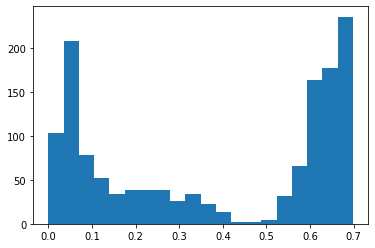

In [86]:
plt.hist(list(np.array(results).flat), 20)

In [89]:
results_df = pd.DataFrame(results, columns = file_ids, index = file_ids)
results_df

,000001,000002,000003,000004,000005,000006,000007,000008,000009,000010,...,000028,000029,000030,000031,000032,000060,000062,000179,000182,000193
000001,0.000000,0.647057,0.092069,0.645919,0.109185,0.649802,0.113568,0.652094,0.112976,0.649396,...,0.663623,0.162700,0.664078,0.221207,0.663368,0.659584,0.659221,0.351572,0.318060,0.609725
000002,0.647057,0.000000,0.658032,0.016384,0.651714,0.038095,0.647630,0.031085,0.649214,0.027479,...,0.071721,0.591857,0.095853,0.558919,0.094976,0.052638,0.062930,0.671287,0.628995,0.294605
000003,0.092069,0.658032,0.000000,0.656400,0.056721,0.660110,0.070706,0.662468,0.059773,0.659800,...,0.675825,0.211896,0.675202,0.262828,0.674410,0.668990,0.668080,0.384039,0.346215,0.623005
000004,0.645919,0.016384,0.656400,0.000000,0.649949,0.042045,0.645801,0.034746,0.647394,0.030054,...,0.081523,0.589695,0.104260,0.556442,0.103188,0.058819,0.068356,0.669170,0.626393,0.287527
000005,0.109185,0.651714,0.056721,0.649949,0.000000,0.653868,0.027481,0.656242,0.020785,0.653499,...,0.669959,0.208319,0.669490,0.252756,0.668679,0.662973,0.662203,0.391906,0.350400,0.614735
000006,0.649802,0.038095,0.660110,0.042045,0.653868,0.000000,0.649920,0.028249,0.651463,0.017598,...,0.067450,0.598375,0.076810,0.565152,0.073966,0.044503,0.055981,0.677289,0.636580,0.308170
000007,0.113568,0.647630,0.070706,0.645801,0.027481,0.649920,0.000000,0.652346,0.029808,0.649477,...,0.666453,0.205733,0.666063,0.243475,0.665210,0.659319,0.658613,0.393801,0.348879,0.607778
000008,0.652094,0.031085,0.662468,0.034746,0.656242,0.028249,0.652346,0.000000,0.653858,0.023508,...,0.062267,0.599054,0.084283,0.566767,0.083198,0.046488,0.058368,0.677444,0.636913,0.307549
000009,0.112976,0.649214,0.059773,0.647394,0.020785,0.651463,0.029808,0.653858,0.000000,0.651060,...,0.667680,0.207332,0.667352,0.247943,0.666530,0.660726,0.660012,0.392934,0.348733,0.611103
000010,0.649396,0.027479,0.659800,0.030054,0.653499,0.017598,0.649477,0.023508,0.651060,0.000000,...,0.068682,0.596393,0.084151,0.563471,0.081876,0.047186,0.058618,0.675504,0.634344,0.302064


In [117]:
results_df.round(2)

,000001,000002,000003,000004,000005,000006,000007,000008,000009,000010,...,000028,000029,000030,000031,000032,000060,000062,000179,000182,000193
000001,0.00,0.65,0.09,0.65,0.11,0.65,0.11,0.65,0.11,0.65,...,0.66,0.16,0.66,0.22,0.66,0.66,0.66,0.35,0.32,0.61
000002,0.65,0.00,0.66,0.02,0.65,0.04,0.65,0.03,0.65,0.03,...,0.07,0.59,0.10,0.56,0.09,0.05,0.06,0.67,0.63,0.29
000003,0.09,0.66,0.00,0.66,0.06,0.66,0.07,0.66,0.06,0.66,...,0.68,0.21,0.68,0.26,0.67,0.67,0.67,0.38,0.35,0.62
000004,0.65,0.02,0.66,0.00,0.65,0.04,0.65,0.03,0.65,0.03,...,0.08,0.59,0.10,0.56,0.10,0.06,0.07,0.67,0.63,0.29
000005,0.11,0.65,0.06,0.65,0.00,0.65,0.03,0.66,0.02,0.65,...,0.67,0.21,0.67,0.25,0.67,0.66,0.66,0.39,0.35,0.61
000006,0.65,0.04,0.66,0.04,0.65,0.00,0.65,0.03,0.65,0.02,...,0.07,0.60,0.08,0.57,0.07,0.04,0.06,0.68,0.64,0.31
000007,0.11,0.65,0.07,0.65,0.03,0.65,0.00,0.65,0.03,0.65,...,0.67,0.21,0.67,0.24,0.67,0.66,0.66,0.39,0.35,0.61
000008,0.65,0.03,0.66,0.03,0.66,0.03,0.65,0.00,0.65,0.02,...,0.06,0.60,0.08,0.57,0.08,0.05,0.06,0.68,0.64,0.31
000009,0.11,0.65,0.06,0.65,0.02,0.65,0.03,0.65,0.00,0.65,...,0.67,0.21,0.67,0.25,0.67,0.66,0.66,0.39,0.35,0.61
000010,0.65,0.03,0.66,0.03,0.65,0.02,0.65,0.02,0.65,0.00,...,0.07,0.60,0.08,0.56,0.08,0.05,0.06,0.68,0.63,0.30


In [108]:
def print_matching_images(check_image_id, results_df, thresh=0.25):
    matching_images = results_df.loc[check_image_id, results_df[check_image_id] < thresh].index.tolist()
    print(f"Images matching {check_image_id} are:\n {matching_images}")

In [109]:
print_matching_images("000002", results_df)

Images matching 000002 are:
 ['000002', '000004', '000006', '000008', '000010', '000012', '000014', '000016', '000018', '000020', '000022', '000024', '000026', '000028', '000030', '000032', '000060', '000062']


In [110]:
print_matching_images("000001", results_df)

Images matching 000001 are:
 ['000001', '000003', '000005', '000007', '000009', '000011', '000013', '000015', '000017', '000019', '000023', '000025', '000027', '000029', '000031']


In [107]:
check_image_id = "000001"
results_df.loc[check_image_id, results_df[check_image_id] < 0.25]

000001    0.000000
000003    0.092069
000005    0.109185
000007    0.113568
000009    0.112976
000011    0.103635
000013    0.095605
000015    0.108743
000017    0.071216
000019    0.148358
000023    0.174775
000025    0.145709
000027    0.173812
000029    0.162700
000031    0.221207
Name: 000001, dtype: float64